# 金融风控-贷款违约预测

## 1. 数据分析

### 1.1 内容介绍

- 大致了解数据集包含的信息
- 查看缺失值和唯一值情况
- 查看数据集中数据类型

### 1.2 数据集导入

导入所需的库

In [1]:
import pandas as pd

读取文件

In [2]:
train = pd.read_csv('train.csv')
test_a = pd.read_csv('testA.csv')

### 1.3 数据集信息

查看数据集的样本数量和特征向量维度

In [3]:
train.shape

(800000, 47)

In [4]:
test_a.shape

(200000, 46)

查看训练集前后五个样本

In [5]:
train.head().append(train.tail())

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0
799995,799995,25000.0,3,14.49,860.41,C,C4,2659.0,7 years,1,...,6.0,2.0,12.0,13.0,10.0,14.0,0.0,0.0,0.0,3.0
799996,799996,17000.0,3,7.90,531.94,A,A4,29205.0,10+ years,0,...,15.0,16.0,2.0,19.0,2.0,7.0,0.0,0.0,0.0,0.0
799997,799997,6000.0,3,13.33,203.12,C,C3,2582.0,10+ years,1,...,4.0,26.0,4.0,10.0,4.0,5.0,0.0,0.0,1.0,4.0
799998,799998,19200.0,3,6.92,592.14,A,A4,151.0,10+ years,0,...,10.0,6.0,12.0,22.0,8.0,16.0,0.0,0.0,0.0,5.0
799999,799999,9000.0,3,11.06,294.91,B,B3,13.0,5 years,0,...,3.0,4.0,4.0,8.0,3.0,7.0,0.0,0.0,0.0,2.0


查看数据集中各条目的信息

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

查看各特征的统计量

In [7]:
train.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252015,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


### 1.4 缺失值和唯一值

由之前info显示的结果，可以看出部分特征中存在缺失值，我们可以采用更直观的方式展现出来

导入画图所需的库

In [8]:
import matplotlib.pyplot as plt

画出有缺失值的特征与其缺失率的图像

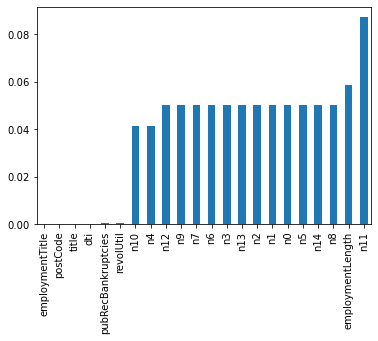

In [9]:
loss_fig = train.isnull().sum()/len(train)
loss_fig = loss_fig[loss_fig > 0]
loss_fig.sort_values(inplace=True)
loss_fig.plot.bar()

对存在过多缺失值的特征进行处理，因为缺失值过多的特征对最后结果的影响不会很大，可以考虑直接删除该特征
从上图可以看出各特征的缺失率都非常小，也表明了该数据集是比较干净的，在数据预处理上可以为我们减少工作

对有唯一值的特征进行查找

In [10]:
unique_val = [col for col in train.columns if train[col].nunique() <= 1]

查看具有唯一值的特征

In [11]:
unique_val

['policyCode']

上面查找的是只有一个值或特征值全部缺失的特征，当然从之前查找缺失值就可以看出不存在特征值全部确实的特征

### 第一周内容完

---

### 1.5 查看数据类型

查看特征的数据类型，一般分为数值型和对象型（即非数值型）

In [12]:
num_fea = list(train.select_dtypes(exclude=['object']).columns)
obj_fea = list(filter(lambda x: x not in num_fea,list(train.columns)))

查看两种类型的特征

In [13]:
num_fea

['id',
 'loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'isDefault',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'title',
 'policyCode',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

In [14]:
obj_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

## 2. 数据预处理及变换

### 2.1 内容介绍
- 数据预处理：
    - 缺失值填充
    - 对象型变换为数值型
    - 异常值处理

### 2.2 数据预处理

导入所需的库

In [15]:
import numpy as np
import datetime

#### 2.2.1 缺失值填充
缺失值填充有多种方法，我们可以多做尝试，选取结果最优的填充方法

查看缺失值情况

In [16]:
train.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           1
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  1
regionCode                0
dti                     239
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      405
revolBal                  0
revolUtil               531
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     1
policyCode                0
n0                    40270
n1                    40270
n2                    40270
n3                  

采用按特征值平均数填充的方法

In [17]:
label = 'isDefault'
num_fea.remove(label)
train[num_fea] = train[num_fea].fillna(train[num_fea].median())
test_a[num_fea] = test_a[num_fea].fillna(train[num_fea].median())

In [18]:
train.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           0
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  0
regionCode                0
dti                       0
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies        0
revolBal                  0
revolUtil                 0
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     0
policyCode                0
n0                        0
n1                        0
n2                        0
n3                  

#### 2.2.2 对象型转变为数值型

根据数据分析阶段我们得到的信息，对象型特征有如下几个

In [19]:
obj_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

根据样本信息可知issueDate与earliesCreditLine都涉及到时间，而其他三个特征可以进行分类
查看可分类的三个特征的类型数量

In [20]:
tmp_fea = ['grade', 'subGrade', 'employmentLength']
for i in tmp_fea:
    print('{}: {}'.format(i, train[i].nunique()))

grade: 7
subGrade: 35
employmentLength: 11


**转变grade与subGrade**  

查看grade的类别

In [21]:
train['grade'].value_counts(dropna=False).sort_index()

A    139661
B    233690
C    227118
D    119453
E     55661
F     19053
G      5364
Name: grade, dtype: int64

查看subGrade的类别

In [22]:
train['subGrade'].value_counts(dropna=False).sort_index()

A1    25909
A2    22124
A3    22655
A4    30928
A5    38045
B1    42382
B2    44227
B3    48600
B4    49516
B5    48965
C1    50763
C2    47068
C3    44751
C4    44272
C5    40264
D1    30538
D2    26528
D3    23410
D4    21139
D5    17838
E1    14064
E2    12746
E3    10925
E4     9273
E5     8653
F1     5925
F2     4340
F3     3577
F4     2859
F5     2352
G1     1759
G2     1231
G3      978
G4      751
G5      645
Name: subGrade, dtype: int64

观察可以推断，grade和subGrade可能为描述同一种属性的特征，通过代码来验证

In [23]:
train.apply(lambda x: x['grade'] not in x['subGrade'], axis=1).sum()

0

可知grade能与subGrade一一对应上，相当于subGrade的前缀，将其删去

In [24]:
for data in [train, test_a]:
    data.drop(['grade'], axis=1, inplace=True)

可知subGrade的几个类别都是存在大小关系的，所以最好通过映射的方式来转换

In [25]:
alpha = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
sub_dict = {}
num = 0
for i in alpha:
    for j in range(1, 6):
        subgrade = '{}{}'.format(i, j)
        sub_dict[subgrade] = num
        num += 1

In [26]:

for data in [train, test_a]:
    # data = pd.get_dummies(data, columns=['subGrade'], drop_first=True)
    data['subGrade'] = data['subGrade'].map(sub_dict)

**转变employmentLength**  

查看employmentLength类型

In [27]:
train['employmentLength'].value_counts(dropna=False).sort_index()

1 year        52489
10+ years    262753
2 years       72358
3 years       64152
4 years       47985
5 years       50102
6 years       37254
7 years       35407
8 years       36192
9 years       30272
< 1 year      64237
NaN           46799
Name: employmentLength, dtype: int64

将年数转化为数字

In [28]:
def yearToNum(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])
for data in [train, test_a]:
    data['employmentLength'].replace(to_replace='10+ years', value='10 years', inplace=True)
    data['employmentLength'].replace('< 1 year', '0 years', inplace=True)
    data['employmentLength'] = data['employmentLength'].apply(yearToNum)

data['employmentLength'].value_counts(dropna=False).sort_index()

0.0     15989
1.0     13182
2.0     18207
3.0     16011
4.0     11833
5.0     12543
6.0      9328
7.0      8823
8.0      8976
9.0      7594
10.0    65772
NaN     11742
Name: employmentLength, dtype: int64

**转变issueDate**  

该类型为时间格式，考虑将其转化为某一时间后的天数

In [29]:
for data in [train, test_a]:
    data['issueDate'] = pd.to_datetime(data['issueDate'],format='%Y-%m-%d')
    startdate = datetime.datetime.strptime('2001-01-01', '%Y-%m-%d')
    data['issueDateDays'] = data['issueDate'].apply(lambda x: x-startdate).dt.days

In [30]:
train['issueDateDays'].sample(5)

358068    5417
360650    5722
532090    5203
362430    5386
416258    5660
Name: issueDateDays, dtype: int64

**转变earliesCreditLine**  

查看其数据类型格式

In [31]:
train['earliesCreditLine'].sample(5)

415999    Oct-1999
148089    Nov-1994
145440    Sep-2003
86260     May-2007
59522     Feb-2004
Name: earliesCreditLine, dtype: object

考虑简单处理，只保留其后面的年份

In [32]:
for data in [train, test_a]:
    data['earliesCreditLine'] = data['earliesCreditLine'].apply(lambda x: int(x[-4:]))

train['earliesCreditLine'].sample(5)

571202    2002
790460    2009
659169    2005
681541    2011
368887    2003
Name: earliesCreditLine, dtype: int64

## 第二周内容完

---

#### 2.2.3 异常值处理

该部分的主要思路是，采用箱型图分析找出各特征的异常值，然后对特征进行分箱并做平滑处理

- 实现箱型图分析

In [33]:
def detect_outliers(data, fea):
    Q1 = np.percentile(data[fea], 25)
    Q3 = np.percentile(data[fea], 75)
    IQR = Q3 - Q1
    outlier_step = IQR * 1.5
    lower_threshold = Q1 - outlier_step
    upper_threshold = Q3 + outlier_step
    data[fea + '_outliers'] = data[fea].apply(lambda x: 1 if x > upper_threshold or x < lower_threshold else 0)
    return data

考虑到存在一些非连续数值型特征，会导致箱型图分析出现较多的异常值，所以筛选出连续性数值型特征

In [34]:
num_serial_fea = []
for fea in num_fea:
    if train[fea].nunique() > 10:
        num_serial_fea.append(fea)
        
num_serial_fea

['id',
 'loanAmnt',
 'interestRate',
 'installment',
 'employmentTitle',
 'annualIncome',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n13',
 'n14']

- 检测异常值并打印信息

In [35]:
for fea in num_serial_fea:
    train = detect_outliers(train, fea)
    fea_outlier = fea + '_outliers'
    print('{}异常值总数: {}'.format(fea, train[fea_outlier].sum()))

id异常值总数: 0
loanAmnt异常值总数: 4246
interestRate异常值总数: 14803
installment异常值总数: 24992
employmentTitle异常值总数: 53171
annualIncome异常值总数: 39014
purpose异常值总数: 2107
postCode异常值总数: 2715
regionCode异常值总数: 14948
dti异常值总数: 3271
delinquency_2years异常值总数: 154285
ficoRangeLow异常值总数: 27667
ficoRangeHigh异常值总数: 27667
openAcc异常值总数: 27439
pubRec异常值总数: 135235
pubRecBankruptcies异常值总数: 99519
revolBal异常值总数: 47355
revolUtil异常值总数: 47
totalAcc异常值总数: 13446
title异常值总数: 114381
n0异常值总数: 180303
n1异常值总数: 15828
n2异常值总数: 21457
n3异常值总数: 21457
n4异常值总数: 33948
n5异常值总数: 34893
n6异常值总数: 46771
n7异常值总数: 32134
n8异常值总数: 30213
n9异常值总数: 19452
n10异常值总数: 26784
n13异常值总数: 43599
n14异常值总数: 20576


可以看出有很多特征存在大量异常值，这明显是不太合理的。而我们通过了解每一个特征代表的含义，可以将大部分去除。这里考虑对异常值在10000以下的特征进行处理

In [37]:
for fea in num_serial_fea:
    if train[fea + '_outliers'].sum() < 10000:
        train = train[train[fea+'_outliers'] == 0]
        train = train.reset_index(drop=True)
    train.drop([fea+'_outliers'], axis=1, inplace=True)
        
len(train)

787815

## 第四周内容完
---

存储处理后的数据集

In [38]:
train.to_csv('clean_train.csv')
test_a.to_csv('clean_test.csv')

## 3. 建立模型

### 3.1 内容介绍
- 模型介绍
- 模型评估方法
- 建模实现
- 调参

### 3.2 模型介绍 

#### 3.2.1 集成模型

集成模型是一种集成多个个体学习器，将弱学习器集成为强学习器的模型，相较于单一的分类器，该模型具有更高的泛化能力。其主要集成方法有bagging和boosting，这两种集成方法在课件上都有讨论。基于bagging思想的主要模型有随机森林，基于boosting思想的模型有：Adaboost，GBDT，XGBoost和LightGBM

#### 3.2.2 LightBGM介绍

LightGBM实际上相当于XGBoost的强化版本，而这两个模型都是基于GBDT的优化版本。相较于XGBoost，LightGBM有着更快的训练速度，更小的内存消耗，更高的准确率以及支持并行的学习。

### 3.3 模型评估方法

#### 3.3.1 介绍
因为竞赛每日提交次数有限，这就需要我们在线下自我评估模型，而评估模型的方法就是划分训练集，一部分作为训练集一部分作为验证集，在训练出模型后，使用划分出来的验证集对模型进行评估。所以模型评估主要讨论的还是样本划分的方法，我们要保证样本训练集和验证集的分布和真实分布一致。

#### 3.3.2 数据集划分

- k折交叉验证  
将样本划分为k折，对样本训练k次，每一次都从k个数据集中选一个作为测试集，其余作为训练集，最后输出k次训练的平均值，数据划分采取分层抽样的方法  
- 留出法  
直接将数据集分成互斥的两份，一份作为训练集一份作为测试集，划分依然采用分层抽样  
- 自助法  
每次从数据集中随机抽取一个样本放入测试集，抽取完后放回数据集，重复n次，得到大小为n的测试集，而从未被抽取到的样本则作为测试集，该划分采用随机抽样，且有放回

### 3.4 建模实现

这里采用LightGBM对数据集进行建模，同时采用k折验证交叉来对模型进行评估。这里提一点，boosting算法本身就不需要对数据进行归一化处理，所以在之前的数据预处理中并没对做这样的操作，而特征选择同理，在lightgbm提供的模型中，已经对征选择进行了实现。  
模型的实现我放在了同目录下的另一个markdown文件中，这里给出链接：[数据建模](https://github.com/AmarKingso/DataMiningTraining/blob/master/FinancialRiskControl/Modeling.md)  
该模型还没有对参数进行优化，这将在之后的工作中实现。

## 第五周内容完
---

### 3.5 调参

#### 3.5.1 调参方法介绍

- 1. 贪心调参  
先采用对当前模型影响最大的参数进行调优，当该参数变成最优后再对次一级影响的参数进行调优，直至调整所有参数。该方法缺点在于可能调到的是局部最优解而不是全局最优解

- 2. 网格搜索  
简而言之就是遍历所有的参数组合，找到最优参数组合，该调参方法得到的结果会优于贪心调参，但只适合较小的样本空间，太大的话搜索效率会大大降低

- 3. 贝叶斯优化  
贝叶斯调参会考虑之前参数的信息，不断添加样本点来更新后验分布；相较于网格搜索，贝叶斯调参的迭代次数少，速度快，对非凸问题依然有很好的表现。而贝叶斯调参也是此次我要选用的调参方法

#### 3.5.2 贝叶斯调参实现步骤

该部分的实现与建模放在同一个笔记中，详细代码请点击[贝叶斯调参](https://github.com/AmarKingso/DataMiningTraining/blob/master/FinancialRiskControl/Modeling.md)  
该实现方法参考了kaggle上的一篇笔记[lgb-贝叶斯调参](https://www.kaggle.com/fayzur/lgb-bayesian-parameters-finding-rank-average)

- 下载贝叶斯优化包 
pip install bayesian-optimization

- 定义优化的目标函数，返回需要优化的指标，即代码中实现的LGB_bayesian函数

- 给定所调参数的范围，即bounds_LGB，要尽可能保证最优参数在给定范围内

- 调用贝叶斯优化方法，maximize()  
该方法中有两个比较重要的参数，都会直接影响到最后得到的参数，一个是n_iter，即贝叶斯优化的步数，步数越多，就越有可能找到一个好的最优值；另一个参数则是init_points，即需要执行多少次随机搜索的步骤，这可以使搜索空间更加多样化

## 第六周内容完
---